## Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

## Data Dictionary for Market Segmentation:

spending: Amount spent by the customer per month (in 1000s)

advance_payments: Amount paid by the customer in advance by cash (in 100s)

probability_of_full_payment: Probability of payment done in full by the customer to the bank

current_balance: Balance amount left in the account to make purchases (in 1000s)

credit_limit: Limit of the amount in credit card (10000s)

min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [50]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [3]:
df=pd.read_csv("bank_marketing_part1_Data-1.csv")
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [5]:
print("Number of rows: ",df.shape[0], "\n""Number. of columns: ",df.shape[1])

Number of rows:  210 
Number. of columns:  7


In [6]:
#Types of variables in the data frame.
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

There are total 210 rows and 7 columns in the dataset. Out of all are float64 data type.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


From the above table no null values are present in the data set.
All data types are float64 and using a memory of 11.6 KB

In [8]:
#Summary
df.describe(include='all')

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [9]:
# Are there any duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [10]:
df[dups]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


Observation:
Data has been loaded correctly into the pandas dataframe

There are 210 rows and 7 columns.

There are no missing values in any columns.

All variables are numeric in nature. There is no categorial variable present.Which is good to perform tests in our problem.

No negative value is present in the dataset.However some columns having values closed zero but no negative.

There is no duplicate rows in dataset.

In [11]:
df.nunique()

spending                        193
advance_payments                170
probability_of_full_payment     186
current_balance                 188
credit_limit                    184
min_payment_amt                 207
max_spent_in_single_shopping    148
dtype: int64

### Data Visualization

#### Univariate Analysis

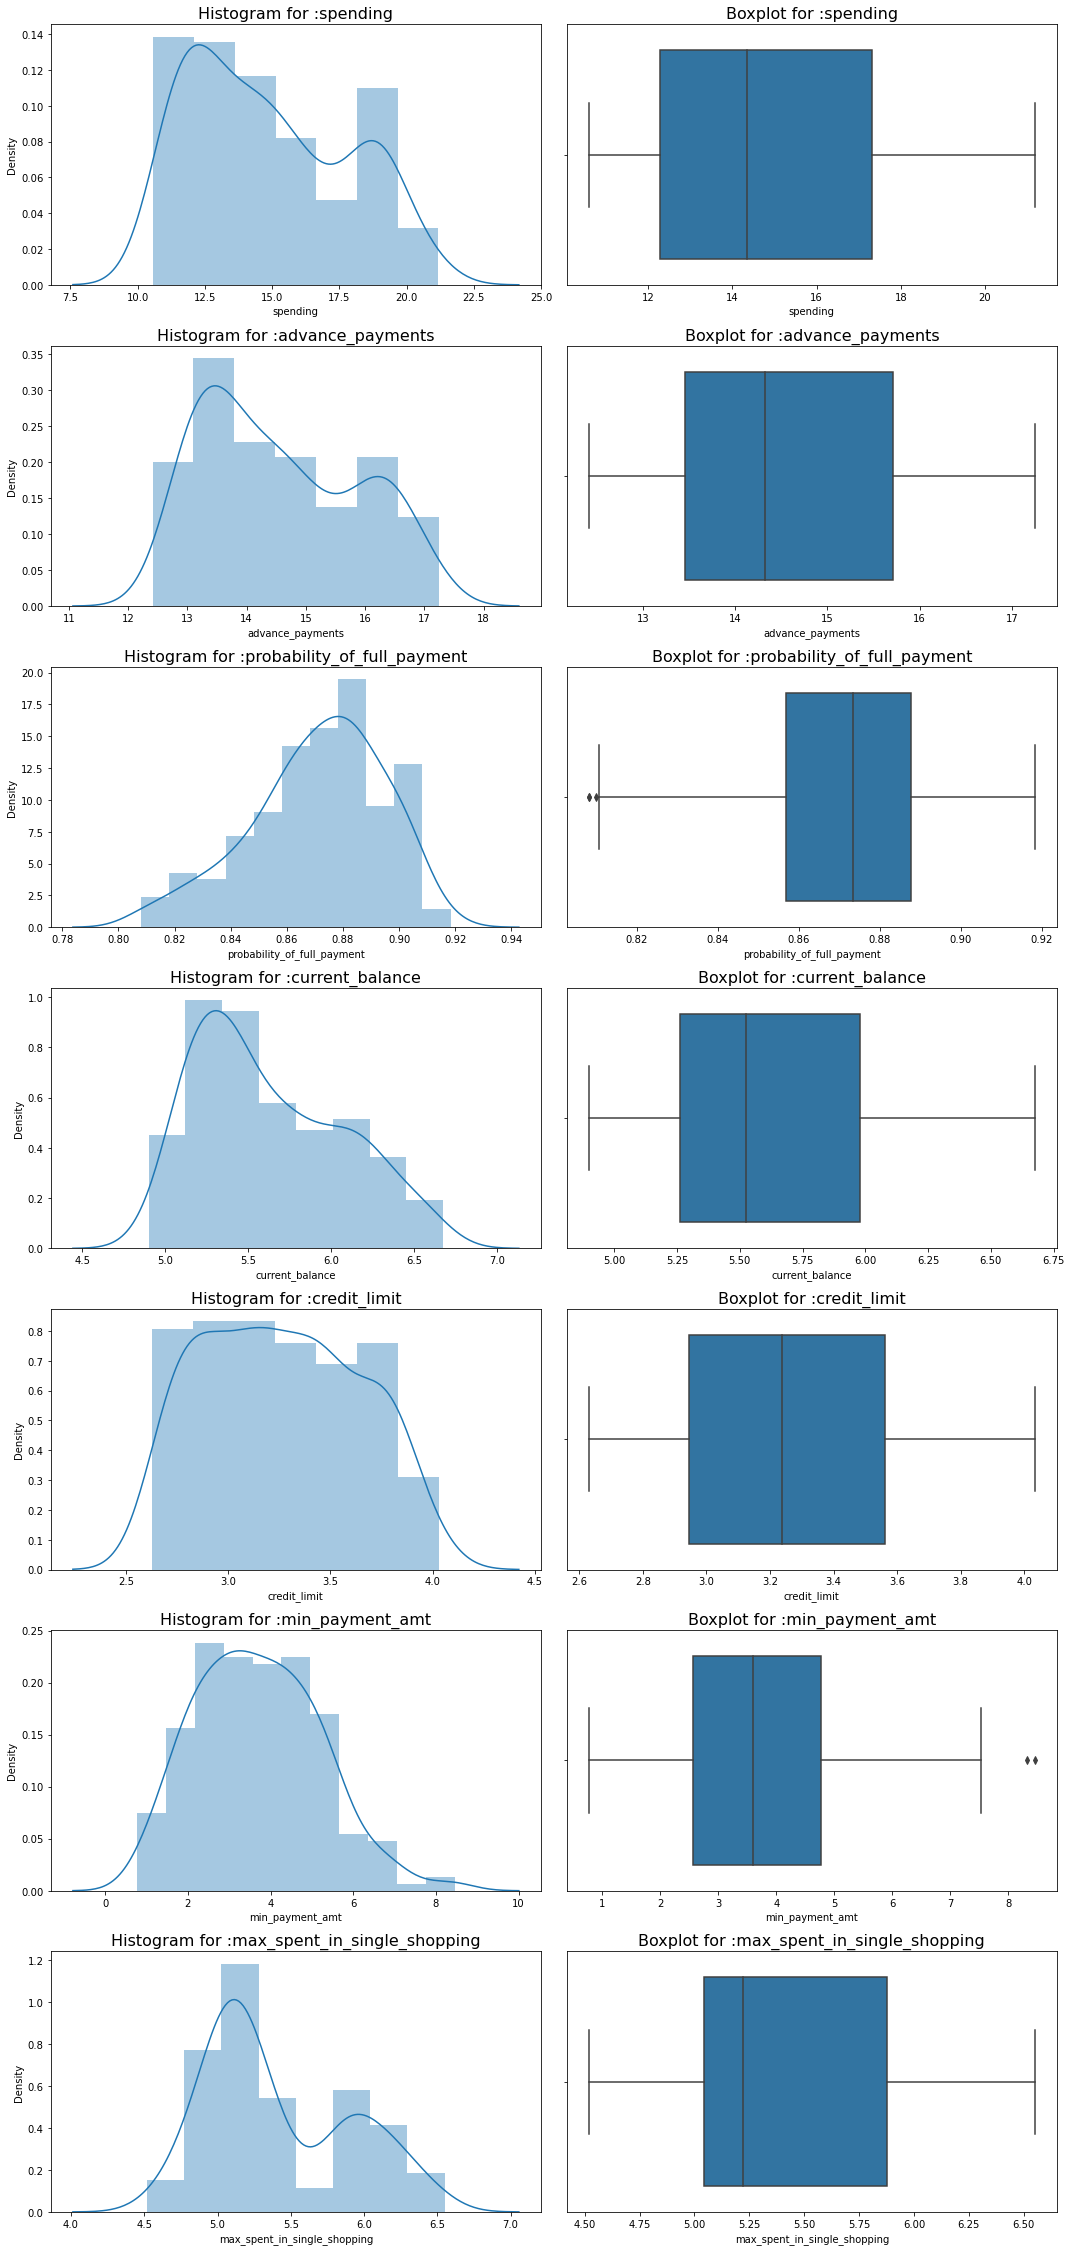

In [10]:
a=1
plt.figure(figsize=(15,80))
for i in df.columns :
    if df[i].dtypes != 'object':
        plt.subplot(18,2,a)
        sns.distplot(df[i])
        plt.title("Histogram for :" +i,fontsize = 16)
        plt.subplot(18,2,a+1)
        sns.boxplot(df[i])
        plt.title("Boxplot for :" +i,fontsize = 16)
        a+=2
plt.tight_layout()

To perform univariate analysis we can use histogram and a box plot. By performing univariate analysis we can observe the following points:-
1. Most the columns are looking right-skew with the help of histogram.
2. The variables which are looking right skew are Spending,advance_payment, current balance,min_payment_amt, and max_spent_in_single_shopping.
3. The variable which is looking left skew is probability_of_full_payment and it also having outliers present in them.
4. Only two variables probability_of_full_payment and min_payment_amt has outliers present in them, rest all other variables don't have. 
4. The variable credit_limit is looking normally distributed. But we cannot trust it just by seeing the histograms and boxplots.To measure the diffrenc we can do skewness.


#### Skewness is a measure of the asymmetry of a distribution. This value can be positive or negative.

#### A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values.
#### A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values.
#### A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

In [11]:
print("Skewness values"'\n',df.skew())

Skewness values
 spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64


As from the table we can easily infere that credit_limit column has a value closest to zero and thus showing a symmetrical behavior. And only column probability_of_full_payment has a negative value which is left skew.
### Note-  Present of skewness in data does not impact the result of clusturs because their is no assumptions of normality here and further if we do an outlier treatment it will measurely be sorted.

#### Multi-variate Analysis

In the below plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

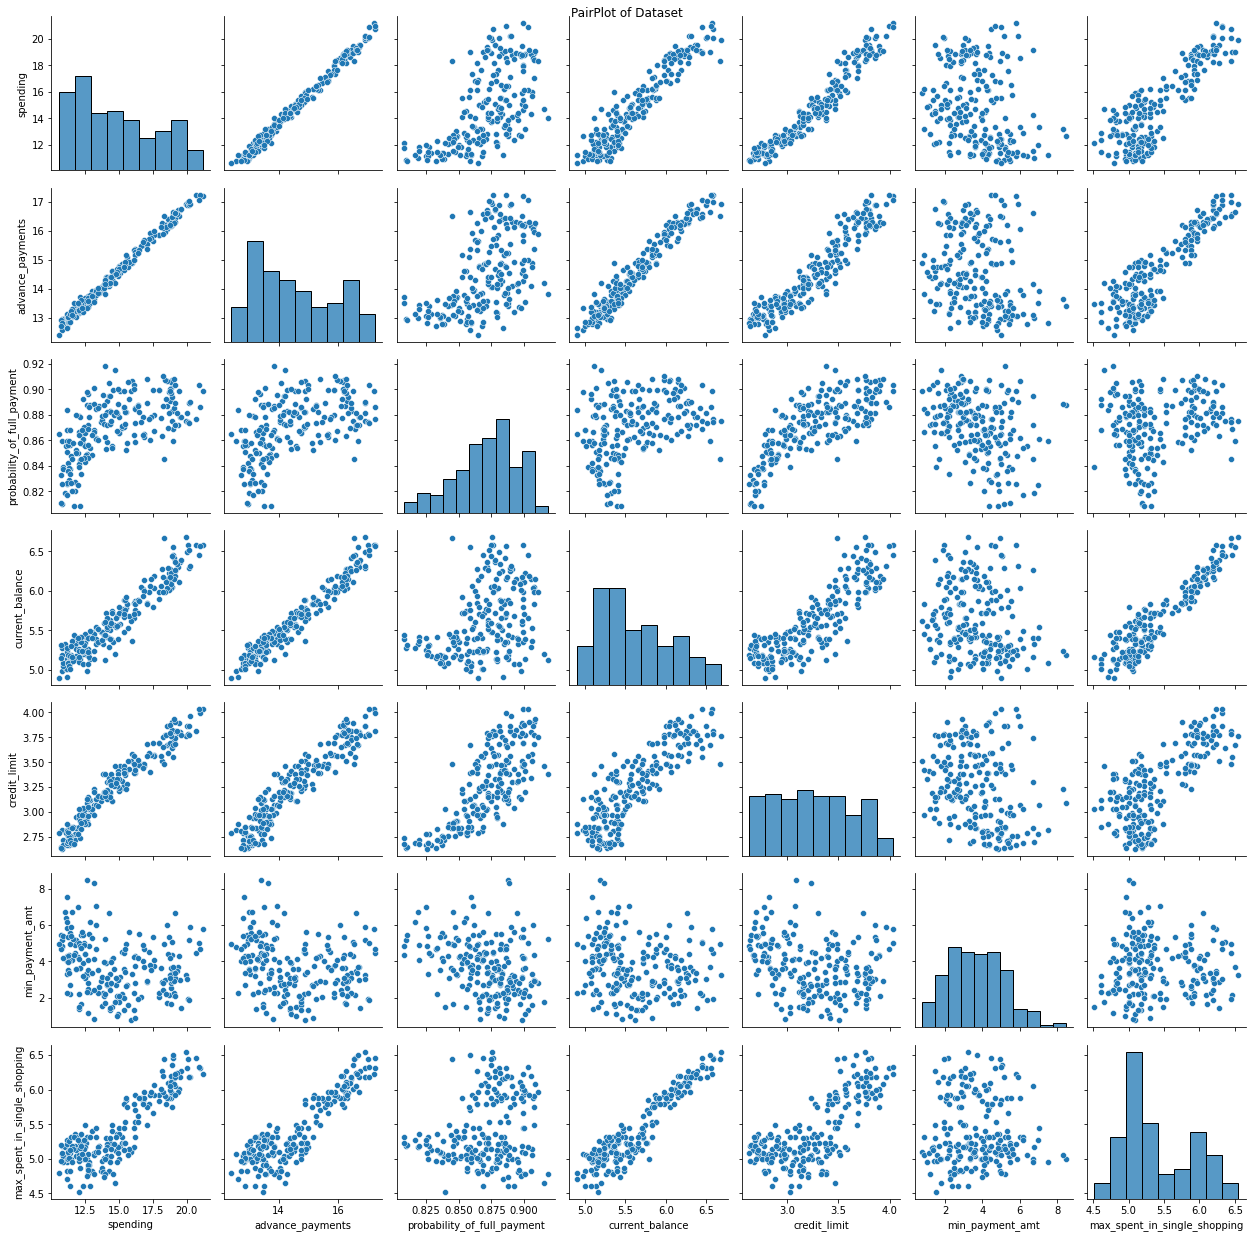

In [12]:
pairplot = sns.pairplot(df)
pairplot.fig.suptitle("PairPlot of Dataset")
plt.tight_layout()

In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

Pairplot shows the relationship between the variables in the form of scatterplot and the distribution of the variable in the form of histogram. From the graph, we can see that there is positive linear relationship between variables like spending and advance_payments. From the histogram we can see that the probability_of_full_payment of the whole dataset is left skewedand rest all are right skewed.

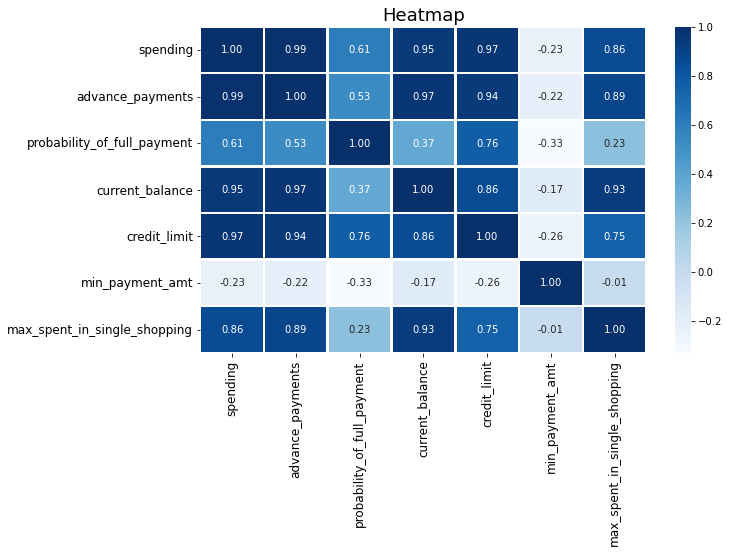

In [105]:
#We can perfom correlation between variables by using heat map
plt.figure(figsize=(10,6))
res=sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="Blues",linewidths=1.5);
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12);
plt.title('Heatmap',fontsize = 18);
plt.savefig("heatmap")

From the Heatmap Graph we can observed that spending and advance_payments is highly co-related with each other and least corelated are probability_of_full_payment and min_payment_amt with each other.

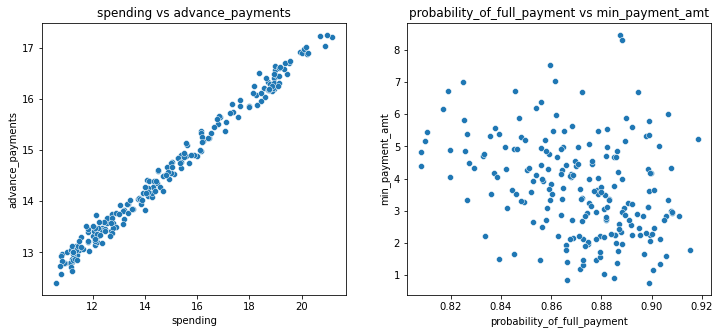

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('spending vs advance_payments')
sns.scatterplot(x="spending",y="advance_payments",data=df)
plt.subplot(1,2,2)
plt.title('probability_of_full_payment vs min_payment_amt')
sns.scatterplot(x="probability_of_full_payment",y="min_payment_amt",data=df);

1. As  from the above graphs we can see that as value of Spending increases the advance_payments value also increases and as the probability 0f full payment value increasing the min payment amt is showing randomness.
2. With increase in Amount spent by the customer per month, customers are more likely to provide advance payment by cash.
3. Minimum amount paid by the customer while making payments for purchases made monthly is not fixed.

In [12]:
data_df=df

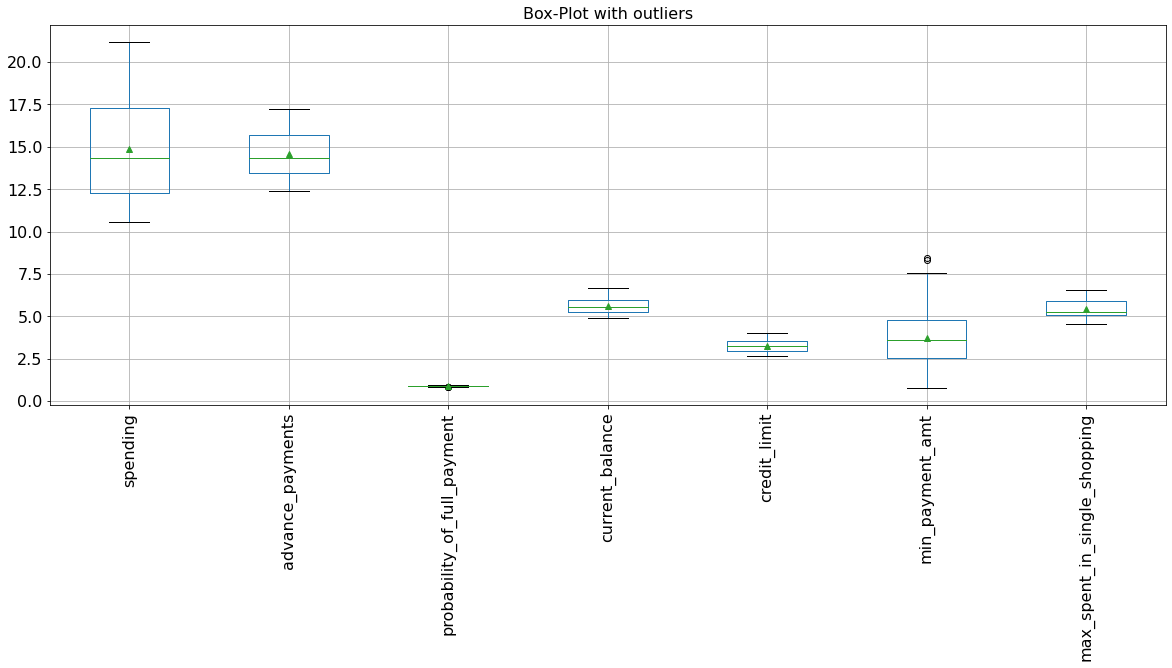

In [13]:
#OUTLIER TREATMENT
data_df.boxplot(figsize=(20,7),showmeans=True,fontsize=16)
plt.xticks(rotation=90)
plt.title("Box-Plot with outliers",fontsize=16)
plt.show()

In [24]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [27]:
#Cap & floor the values beyond the outlier boundaries
feature_list = data_df.columns
for i in feature_list:
    LL, UL = remove_outlier(data_df[i])
    data_df[i] = np.where(data_df[i] > UL, UL, data_df[i])
    data_df[i] = np.where(data_df[i] < LL, LL, data_df[i])

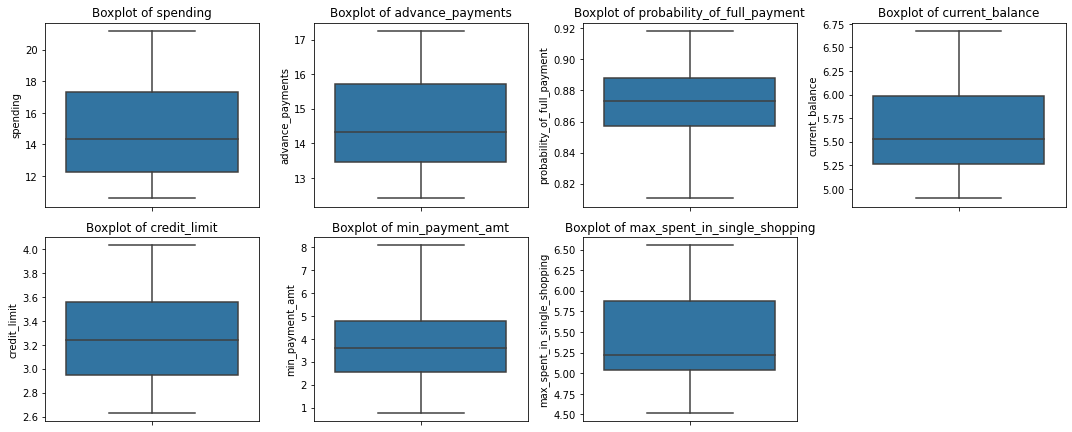

In [33]:
#Check to verify if outliers have been treated
plt.figure(figsize = (15,15))
feature_list = data_df.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = data_df[feature_list[i]], data = data_df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

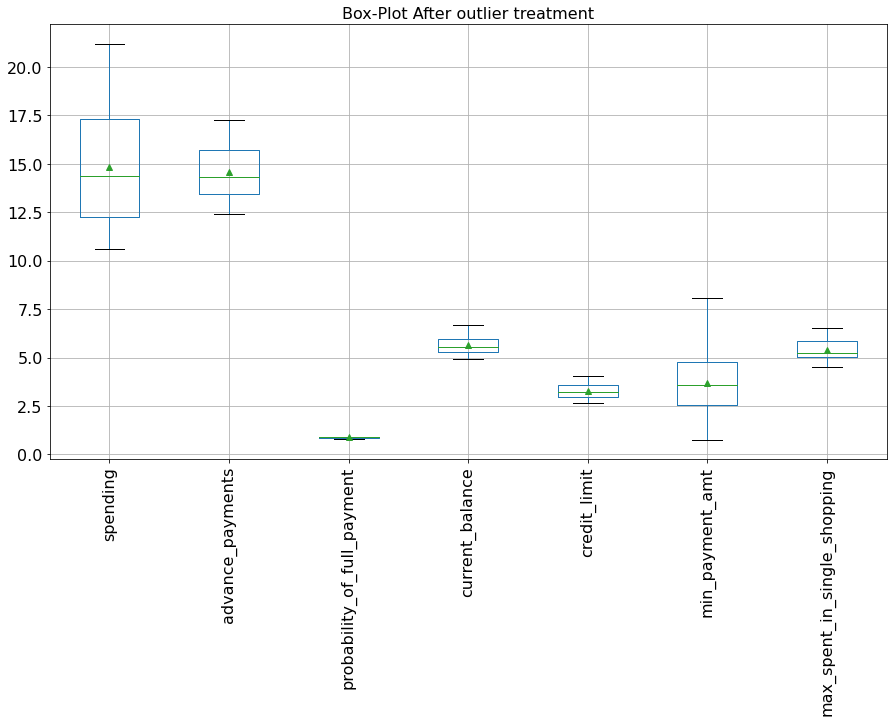

In [36]:
data_df.boxplot(figsize=(15,8),showmeans=True,fontsize=16)
plt.xticks(rotation=90)
plt.title("Box-Plot After outlier treatment",fontsize=16)
plt.show()

In [14]:
#Outlier removed data store in df_scale 
df_scale=data_df

In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [16]:
X = MinMaxScaler()

In [17]:
C = StandardScaler()

In [18]:
#Data before scaling
data_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [19]:
scaled_df =  pd.DataFrame(X.fit_transform(df_scale), columns=df_scale.columns)
scaled_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.402032,0.444067,0.570767,0.410773,0.448043,0.381633,0.437751
std,0.274759,0.269826,0.214423,0.249473,0.269219,0.195498,0.241989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158640,0.214876,0.442831,0.204533,0.223806,0.233575,0.258986
50%,0.355524,0.394628,0.593013,0.351633,0.432644,0.368474,0.346627
75%,0.634089,0.682851,0.723004,0.608530,0.664113,0.520570,0.668636
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
scaled_df1 = pd.DataFrame(C.fit_transform(df_scale), columns=df_scale.columns)
scaled_df1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.260896e-15,-1.358702e-16,-2.790757e-16,5.418946e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


In [21]:
dfff=dff

NameError: name 'dff' is not defined

## 1.2  Do you think scaling is necessary for clustering in this case? Justify

Yes Scaling is necessary for clustering in this case. Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set current_balance,speding, max_spent_in_single_shopping is having values in thousands(1000s) and advance_payments and min_payment_amt in hundreds(100s). Since the data in these variables are of different scales, it is tough to compare these variables.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

The three most commonly used scaling techniques are StandardScaler , Z-score and Min-Max Scaling. 

Whenever we assume the normality their we use StandardScaler and z-score, but when their is no assumptions of normality we use Min-Max Scaler. In this case also we will use Min-Max Scaler.


Min-Max Scaling: The MinMax method linearly rescales every feature to the [0,1] interval. The presence of this bounded range - in contrast to z-score scaling - is that wewill end up with smaller standard deviations, which can suppress the effect of outliers. 

In [39]:
data_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.871025,5.628533,3.258605,3.697288,5.408071
std,2.909699,1.305959,0.023560,0.443063,0.377714,1.494689,0.491480
min,10.590000,12.410000,0.810588,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.079625,6.550000


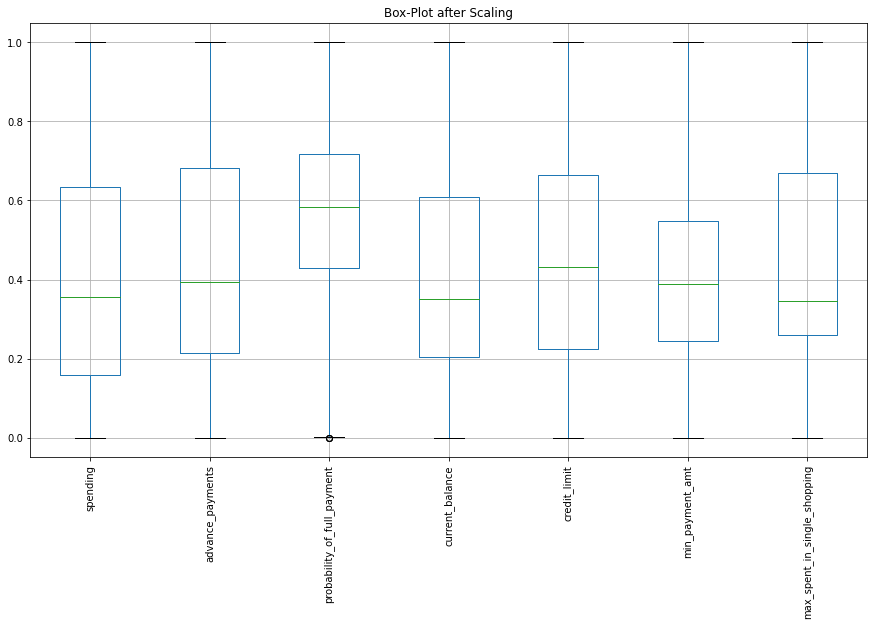

In [63]:
scaled_df.boxplot(figsize=(15,8))
plt.title("Box-Plot after Scaling")
plt.xticks(rotation=90);

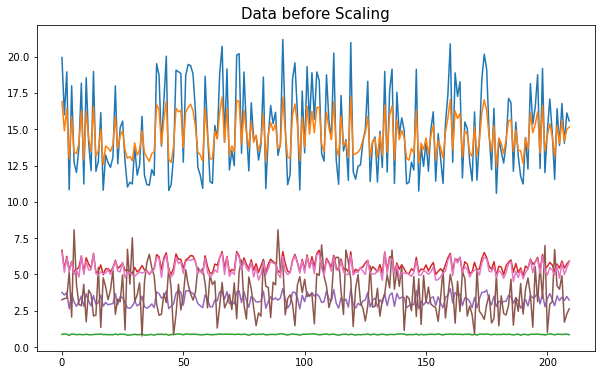

In [73]:
plt.figure(figsize=(10,6))
plt.plot(data_df)
plt.title("Data before Scaling",fontsize=15)
plt.show()

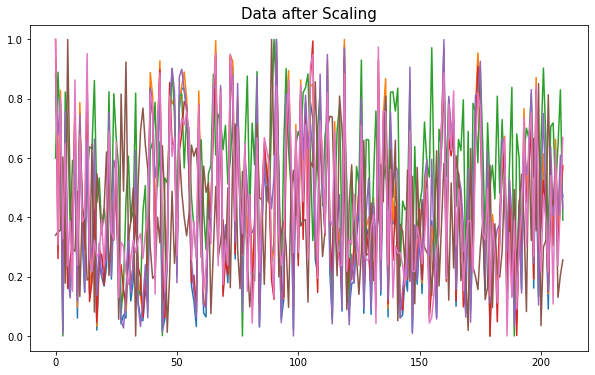

In [72]:
plt.figure(figsize=(10,6))
plt.plot(scaled_df)
plt.title("Data after Scaling",fontsize=15)
plt.show()

## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [74]:
#Creating the Dendrogram
#Importing dendrogram and linkage module
from scipy.cluster.hierarchy import dendrogram, linkage

#### Chosing averge linkage method

In [76]:
link_method = linkage(scaled_df, method = 'ward',metric='euclidean')

Here we are using wards linkage method because in wards linkage method  its sees the intercluster variance where the change is minimum that is where the point will be joint.Mostly we want that whith in the cluster the variance should be minimum and between  the cluster variance should be maximum.
So euclidean for distance calculation and wards for linkage is the most used method.

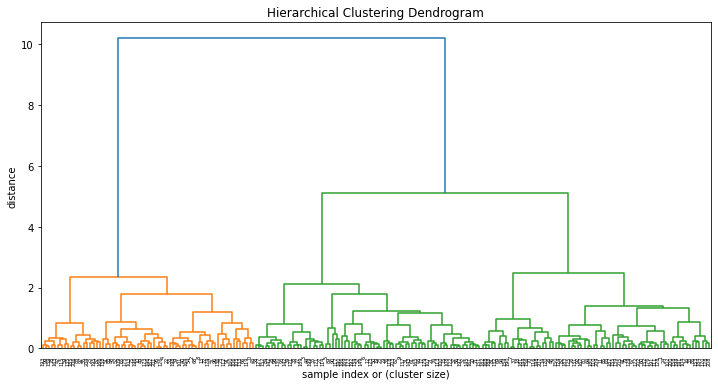

In [90]:
plt.figure(figsize=(12,6))
dend=dendrogram(link_method)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance');

A dendrogram is a visualization in form of a tree showing the order and distances of merges during the hierarchical clustering.

As we can see that dendogram is in complex state and the labels on x axis are not readable due to lagre amount of data set. So we will pass some addtional parametres to truncate the dendogram so that we can see a neat outlook of dendogram.
So, we have to take some suitable clusters
So we will see the dendogram from the top i.e. from the last n numbers of associations. So inspite seeing whole dendogram associations we will about last 10 to 15 associations which give a better view that is how many groups are possible in the data.


### Cutting the dendogram with suitable clusters

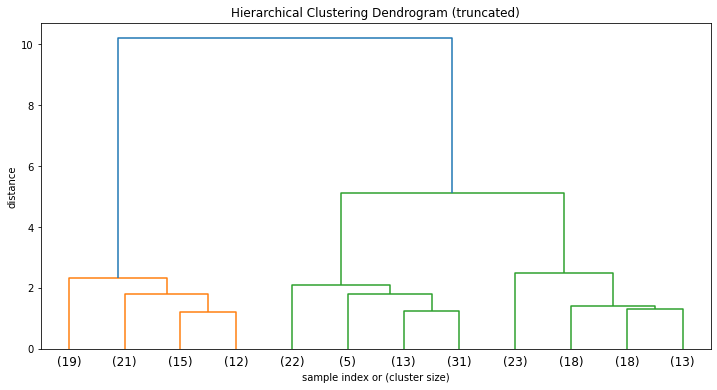

In [107]:
plt.figure(figsize=(12,6))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 12,
                 )

The Dendrogram tell us which all sample index joined first just like in orange color 15 and 12 joined first to form cluster and then addition of 15 and 12 gets added to 21 to form bigger cluster and then it added to 19 to form bigger cluster.

Identifying the number of optimum groups using Dendrogram is highly subjective. But to take appropriate or better numbers of cluster or groups is by counting the numbers of colors in Dendrogram. Right now we can see only three colors in it, so we can take 3 groups and start analyzing it. 


### Importing fcluster module to create clusters

In [108]:
from scipy.cluster.hierarchy import fcluster


In [112]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters = fcluster(link_method, 3, criterion='maxclust')
print("The numbers of Labels for each observation in dataset","\n",clusters)

The numbers of Labels for each observation in dataset 
 [1 3 1 2 1 2 2 3 1 2 1 3 2 1 3 2 3 2 3 2 2 2 1 2 3 1 3 2 2 2 3 2 2 3 2 2 2
 2 2 1 1 3 1 1 2 2 3 1 1 1 2 1 1 1 1 1 2 2 2 1 3 2 2 3 3 1 1 3 1 3 3 2 1 1
 2 1 3 2 1 3 3 3 3 1 2 3 3 1 1 2 2 1 3 2 3 1 1 1 2 1 2 1 3 1 3 1 1 2 2 1 3
 3 1 2 2 1 3 2 2 1 3 2 2 2 3 3 1 2 3 3 2 3 3 1 2 1 1 2 1 3 2 3 2 2 3 2 1 2
 3 2 3 2 3 3 3 3 3 2 3 1 1 2 1 1 1 2 1 3 3 2 3 2 3 1 1 1 3 2 3 2 3 3 3 3 3
 1 2 3 3 2 3 3 2 1 3 1 1 2 1 2 3 1 3 2 1 3 1 3 3 3]


By using fcluster module and taking 3 groups we got labels from range 1 to 3 . By taking 3 groups the data got divided into 3 buckets and it returns a labels for each observation that out of 210 observations which are they part of. For example the first label 1 is a part of first observation of our data set and label 3  is a part of second observation of our data set and soo on.
The total numbers of labels which are generated will be equal to the total number of observations present in our dataset.

### Appending clusters to original dataset

In [113]:
dff=df

In [116]:
#So now we are appending these generated labels back to our original dataset. 
#And Below is the sample table for dataset set with clusters column attached to it. 
dff['clusters'] = clusters
dff

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,3
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,3
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,3


In [124]:
#Now by seeing cluster frequency we can make out how many observations are been distributed to which label
print("Cluster Frequency" "\n",  
      dff.clusters.value_counts().sort_index())

Cluster Frequency
 1    67
2    71
3    72
Name: clusters, dtype: int64


### Cluster Profiles

In [126]:
aggdata=dff.groupby('clusters').mean()
aggdata['Freq']=dff.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.452537,16.184776,0.884042,6.173567,3.69206,3.696179,6.037224,67
2,11.988592,13.309577,0.849099,5.248197,2.86869,4.891268,5.111732,71
3,14.312083,14.279028,0.880457,5.496403,3.23975,2.529419,5.114833,72


In [136]:
### Using Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

In [137]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(dff)
print(Cluster_agglo)

[0 2 0 1 0 1 1 2 0 1 0 2 1 0 2 1 2 1 2 1 1 1 0 1 2 0 2 1 1 1 2 1 1 2 1 1 1
 1 1 0 0 2 0 0 1 1 2 0 0 0 1 0 0 0 0 0 1 1 1 0 2 1 1 2 2 0 0 2 0 1 2 1 0 0
 1 0 2 1 0 2 2 2 2 0 1 2 2 0 0 1 1 0 2 1 1 0 0 0 1 0 1 0 2 0 2 0 0 1 1 0 2
 2 0 1 1 0 2 1 1 0 2 1 1 1 2 2 0 1 2 2 1 2 1 0 1 0 0 1 0 2 0 2 1 1 2 1 0 1
 2 1 2 1 2 2 1 2 2 1 2 0 0 1 0 0 0 1 0 2 2 2 2 1 2 0 0 0 2 2 2 1 2 2 2 2 2
 0 2 2 2 1 1 2 1 0 2 0 0 1 0 1 2 0 2 1 0 2 0 2 2 2]


In [138]:
dff["Agglo_CLusters"]=Cluster_agglo

In [139]:
dff.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'clusters', 'Agglo_CLusters'],
      dtype='object')

In [140]:
agglo_data=dff.drop(["clusters"],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq']=dff.Agglo_CLusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_CLusters,,,,,,,,
0,18.413235,16.166029,0.884163,6.166221,3.688265,3.724074,6.023971,68
1,11.926806,13.262500,0.851085,5.229319,2.865333,4.885000,5.095625,72
2,14.387857,14.332286,0.878693,5.516829,3.245729,2.458360,5.131143,70


### 1.4  Apply K-Means clustering on scaled data and determine optimum.Clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.


In [25]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
####Creating Clusters using KMeans
k_means = KMeans(n_clusters = 2,random_state=1)

In [26]:
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

#### Cluster Output for all the observations

In [27]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

#### Calculating WSS for other values of K - Elbow Method

In [56]:
wss =[]

In [57]:
for i in range(1,21):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [58]:
print("cluster variance for each value of k")
wss

cluster variance for each value of k


[88.98592483911841,
 34.81326792694562,
 22.024363075666038,
 18.654047085388857,
 16.234070627720243,
 14.663329738223498,
 13.272775018856654,
 11.925046068139041,
 11.197509979797259,
 10.57565139585104,
 9.558745582993335,
 9.311090100376045,
 8.736632292614074,
 8.306936394856764,
 7.89246369441356,
 7.664182982653554,
 7.376630559708453,
 7.238147773436651,
 6.823631830585529,
 6.467285963921489]

In [59]:
a=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

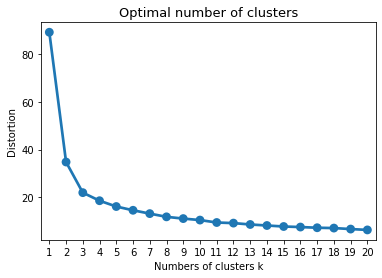

In [71]:
sns.pointplot(a, wss,figsize=(25,20))

plt.xlabel('Numbers of clusters k')
plt.ylabel('Distortion')
plt.title("Optimal number of clusters",fontsize=13)
plt.show()        

In [88]:
ss = []
for i in range (2,21):
    k_means = KMeans(n_clusters = i,random_state=1)
    k_means.fit(df_scale)
    labels = k_means.labels_
    print("For cluster k=",i,":","silhouette_score is",silhouette_score(df_scale,labels,random_state=1))

For cluster k= 2 : silhouette_score is 0.5182873410849096
For cluster k= 3 : silhouette_score is 0.4719337319126884
For cluster k= 4 : silhouette_score is 0.39646457495739745
For cluster k= 5 : silhouette_score is 0.3613234083219359
For cluster k= 6 : silhouette_score is 0.36127102942872574
For cluster k= 7 : silhouette_score is 0.3541893658773442
For cluster k= 8 : silhouette_score is 0.3630850573920109
For cluster k= 9 : silhouette_score is 0.3577472531219429
For cluster k= 10 : silhouette_score is 0.35460076666563944
For cluster k= 11 : silhouette_score is 0.34170175323375057
For cluster k= 12 : silhouette_score is 0.3143127814363453
For cluster k= 13 : silhouette_score is 0.3243070830198718
For cluster k= 14 : silhouette_score is 0.3280972952807698
For cluster k= 15 : silhouette_score is 0.3294904502811524
For cluster k= 16 : silhouette_score is 0.3272734294141822
For cluster k= 17 : silhouette_score is 0.3107799612001243
For cluster k= 18 : silhouette_score is 0.31713779775167644


### KMeans with K=3

In [106]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scale)
labels1 = k_means.labels_

#### Cluster evaluation for 3 clusters: the silhouette score

In [93]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [94]:
# Calculating silhouette_score
silhouette_score(df_scale,labels,random_state=1)

0.46760730950395385

### Appending Clusters to the original dataset

In [103]:
df["Clus_kmeans3"] = labels1
data_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


In [102]:
df.Clus_kmeans3.value_counts().sort_index()

0    72
1    77
2    61
Name: Clus_kmeans3, dtype: int64

In [101]:
clust_profile=df
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=data_df.Clus_kmeans3.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans3,,,,,,,,
0,14.648472,14.460417,0.879167,5.563778,3.277903,2.648933,5.192319,72
1,11.964416,13.274805,0.852200,5.229286,2.872922,4.759740,5.088519,77
2,18.721803,16.297377,0.885087,6.208934,3.722672,3.603590,6.066098,61


<Figure size 1080x720 with 0 Axes>

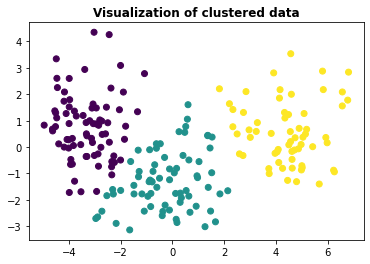

In [116]:
from sklearn.decomposition import PCA
import pylab as pl
pca = PCA(n_components=3).fit(df_scale)
pca_2d= pca.transform(df_scale)
plt.figure(figsize=(15,10))
plt.figure("K-means with 3 clusters")
plt.scatter(pca_2d[:, 0],pca_2d[ :, 1],c=k_means.labels_)
plt.title('Visualization of clustered data', fontweight='bold')
pl.show();

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [117]:
#Below is the cluster profiling with original data set and a freq column is added at last which tells us 
#the total number of customers grouped under a specific cluster. 


clust_profile=df
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=data_df.Clus_kmeans3.value_counts().sort_index()
clust_profile.T

Clus_kmeans3,0,1,2
spending,14.648472,11.964416,18.721803
advance_payments,14.460417,13.274805,16.297377
probability_of_full_payment,0.879167,0.852200,0.885087
current_balance,5.563778,5.229286,6.208934
credit_limit,3.277903,2.872922,3.722672
min_payment_amt,2.648933,4.759740,3.603590
max_spent_in_single_shopping,5.192319,5.088519,6.066098
freq,72.000000,77.000000,61.000000


So here we have group by the clusters and taken the average of all the variable values. And taking average will not be affected as we have done the outlier treatment.

From the table 4.4, cluster 0 has all the average values of all the variables with freq of 72 that means in cluster 0 total 72 customers are grouped. Similarly in cluster 1 total 77 customers are grouped and in cluster 2 total 61 customers are grouped.  

#### Observation:- 

a) Group 2 customers has the highest number of spending as compared to the group 1 customers. 

b) There is not much difference between all the groups regarding the Probability of payment done in full by the customers to the bank but then also customers in group 2 still have higher probability of doing the payment.

c) Customers in group 1 use less cash for doing the payment in advance. While customers in group 2 uses a higher number of cash in doing the advance payment. 

d) Balance amount left in the account to make purchases is almost same of customers in groups 0 and 1 but in group 2 it has a slightly higher.


e) Credit limit given to customers in group 0 and 2 are almost similar but for group 1 customers has less credit limit. As the spending is large than more credit limit is required.

f) Maximum amount spent in one purchase is almost same for group 0 and group 1 customers. 
   In group 2 customers they spent more than customers which are in group 0 and 1


### Recommendations

a) We can reduce the amount paid by customers in cash by providing online facilities to them like net banking, UPI some cashbacks for different transactions, some discounted coups so that they can move on from cash to online banking. 
Moving customers to online transactions is also goods for every monthly payment they visit to bank and we have to put different types of amenities for them. So if less customers visit to bank less staff we have to deploy. 

b) In group 0, customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate. Increase their spending habits by tieing up with grocery stores, utilities (electricity, phone, gas, others)

c) In group 1, they are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
-Promote premium cards/loyalty cars to increase transactions.
-Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourage them to spend more.

d) In group 2, giving any reward points might increase their purchases.
- Maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment
- Increase their credit limit.
- Increase spending habits.
- Give loan against the credit card, as they are customers with good repayment record.
- Tie up with luxury brands, which will drive more one time_maximun spending.


## Problem 2: CART-RF-ANN
An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

#### Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10.Age of insured (Age) 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [4]:
df2=pd.read_csv("insurance_part2_data.csv")
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
df2.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


From the table above we can the follwing observations :-
1. Dataset has no null values
2. Range Index is from 0 to 2999
3. Memory usage is 234.5K+ KB
4. Dataset has 3 types of datatypes which are float64(2), int64(2), object(6)
5. Total number of columns in Dataset are 10
6. Columns like Age, Duration are int(64) types that means they are numeric in nature.
7. Agency_Code,Type,Claimed,Channel,Product_Nmae,Destination are Object types which means they are Categorical in nature.
8. Columns like Commision and Sales are of float(64) types which mean they are having decimal value. 

In [7]:
#Check for missing value in any column
df2.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [8]:
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 139


As it is showing there are 139 duplicated records, but it can be of different customers, there is no customer ID or any unique identifier, so we are not dropping them off.

In [9]:
#Numeric Summary
df2.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


From the above table we can Observe the following points :
1. Customer age's varies from 8 to 84. That means customers below +18 (Kids) and above 60+(Senior citizen) are presnt.
2. Age variable values of mean 38.09 and 50%(Median) 36 doest have much deflection that means Age column is normally distributed.
3. Similary variables like Commision,Duration and Sales seems to have not normally distributed because the mean and median (50%) values diffrences.
4. Duration variable has a negetive minimum value which is not possible it must be non zero or something else but not negative because duration is in days and days cannot be in negative.

In [10]:
df2.describe(include="object")

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
count,3000,3000,3000,3000,3000,3000
unique,4,2,2,2,5,3
top,EPX,Travel Agency,No,Online,Customised Plan,ASIA
freq,1365,1837,2076,2954,1136,2465


From the Table above we infer following points :-
1. Total 4 types Agency are there among which EPX has higher number of observations than JZI  which has least.
2. Customers taken Travel agency insurance firms more as compared to Airlines with an online channel mode.
3. Customised Plan is the most taken plan by the customers.

In [84]:
df2['Duration'] = df2['Duration'].replace(to_replace=-1,value=0)

In [273]:
##Geting unique counts of all Nominal Variables
for column in df2[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),':',df2[column].nunique())
    print(df2[column].value_counts().sort_values())
    print('\n')

KeyError: "['Claimed'] not in index"

## Data Visulization
## Univariate Analysis and Bivariate analysis

#### Visulization of Numeric Variables

C:\Users\VAIBHAV SINGH BISHT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VAIBHAV SINGH BISHT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VAIBHAV SINGH BISHT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (a

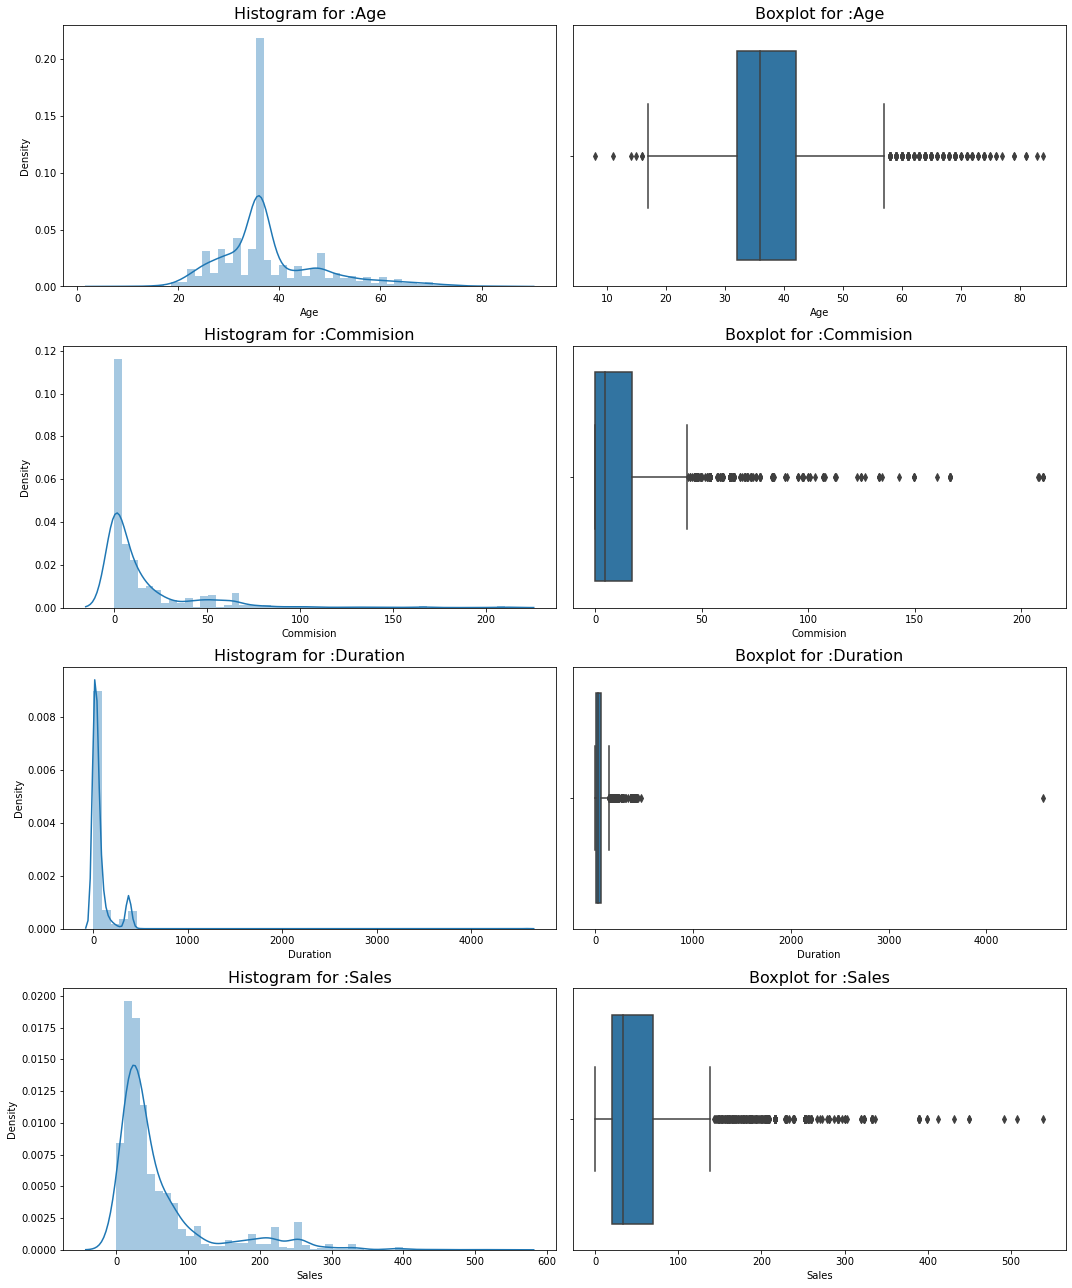

In [12]:
a=1
plt.figure(figsize=(15,80))
for i in df2.columns :
    if df2[i].dtypes != 'object':
        plt.subplot(18,2,a)
        sns.distplot(df2[i])
        plt.title("Histogram for :" +i,fontsize = 16)
        plt.subplot(18,2,a+1)
        sns.boxplot(df2[i])
        plt.title("Boxplot for :" +i,fontsize = 16)
        a+=2
plt.tight_layout()

From the above histogram and Boxplot chart we have following Observations :-a
1. Almost all variables have outliers present in them.
2. Only Age column is looking normally distrubed and all other right skew.
3. In Age column the most customer are insured around from age 34 to 38.
4. The commission received for tour insurance firm is depend on percentage of Sales. As the sales increases them commision percentageage will also increase. 
5. Duration column has a one outlier which is the highest amoung rest of the outliers in Duration column.
6. On an average persons travel around more or less upto 70 days.
7. Sales and commision can be a geneniun business value as Commission is in percentage of sales in the dataset.

#### Skewness is a measure of the asymmetry of a distribution. This value can be positive or negative.
A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values.

A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values.

A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

In [13]:
print("Skewness values"'\n',df2.skew())

Skewness values
 Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64


As from the table we can easily infere that all the columns are having a positive value thats why thier tail is on the right side and they will be right skew.

#### Visulization of Categorical Variables

C:\Users\VAIBHAV SINGH BISHT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VAIBHAV SINGH BISHT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


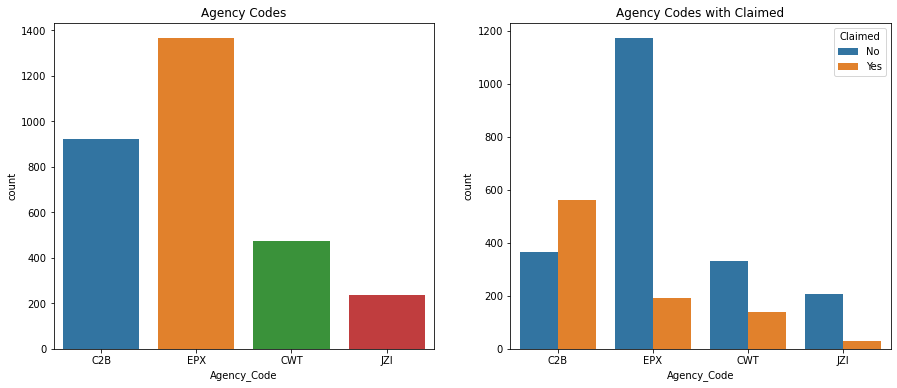

In [14]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df2['Agency_Code'])
plt.title("Agency Codes")
plt.subplot(1,2,2)
sns.countplot(df2['Agency_Code'],hue=("Claimed"),data=df2)
plt.title("Agency Codes with Claimed");

Observation from above Bar charts
1. As we have 4 agencies, Epx is the most used firm used by the customers and lowest is JZI
2. The Most number of claims are in C2B agency code and the least made by is JZI agency code.
3. A large amount of Customers while traveling through EPX agency taken No claim which is good.
4. While in JZI agency has the least in which customers made no claim.

C:\Users\VAIBHAV SINGH BISHT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VAIBHAV SINGH BISHT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


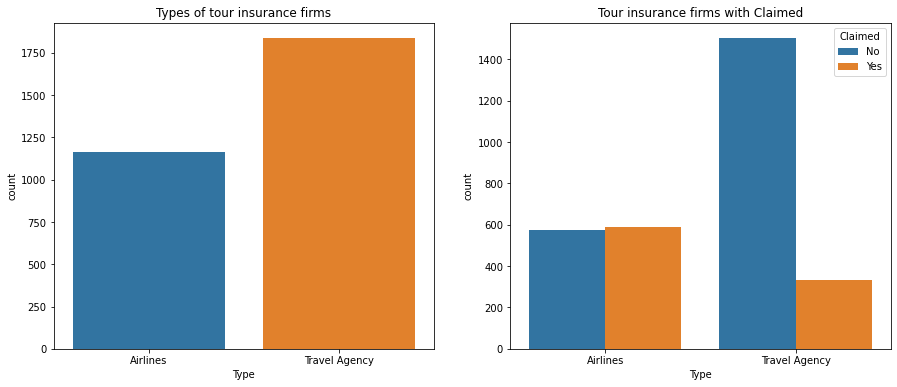

In [15]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df2['Type'])
plt.title("Types of tour insurance firms")
plt.subplot(1,2,2)
sns.countplot(df2['Type'],hue=("Claimed"),data=df2)
plt.title("Tour insurance firms with Claimed");

Observation from above Bar charts

1. As we have 2 tour insurance firms, among which Travel Agency has higher number of insurances made by customers with less number of claimed they made.
2. Airlines has less number of number of insurances but claimed are almost equal as the numbers of customers has used airline agency they has also claimed equally.

C:\Users\VAIBHAV SINGH BISHT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VAIBHAV SINGH BISHT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


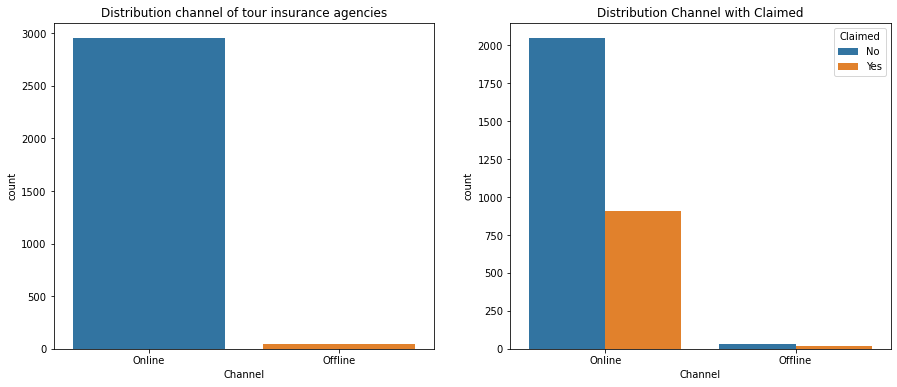

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df2['Channel'])
plt.title("Distribution channel of tour insurance agencies")
plt.subplot(1,2,2)
sns.countplot(df2['Channel'],hue=("Claimed"),data=df2)
plt.title("Distribution Channel with Claimed");

From the table above the mode of distribution of insurance to customers is high through online channel. And Claimed made by customers also high through online channel as compared to offline mode.

C:\Users\VAIBHAV SINGH BISHT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VAIBHAV SINGH BISHT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


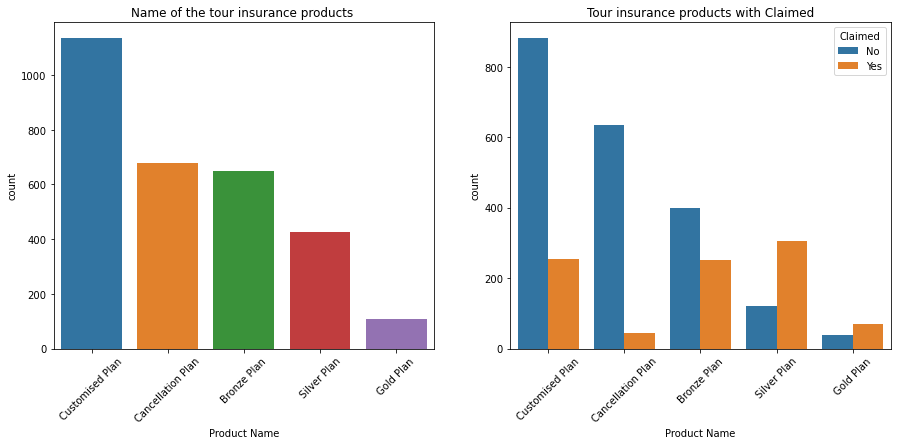

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
chart=sns.countplot(df2['Product Name'])
plt.title("Name of the tour insurance products ")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.subplot(1,2,2)
chart2=sns.countplot(df2['Product Name'],hue=("Claimed"),data=df2)
plt.title("Tour insurance products with Claimed")
chart2.set_xticklabels(chart.get_xticklabels(),rotation=45);

Observation from above Bar charts

1. Customers prefer Customised Plan the most then after cancellation and bronze plan.
2. Gold Plain is the tour insurance product which is least prefer by customers.
3. Silver Plan has the the highest number of claims and least has Cancelation plan.

C:\Users\VAIBHAV SINGH BISHT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VAIBHAV SINGH BISHT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


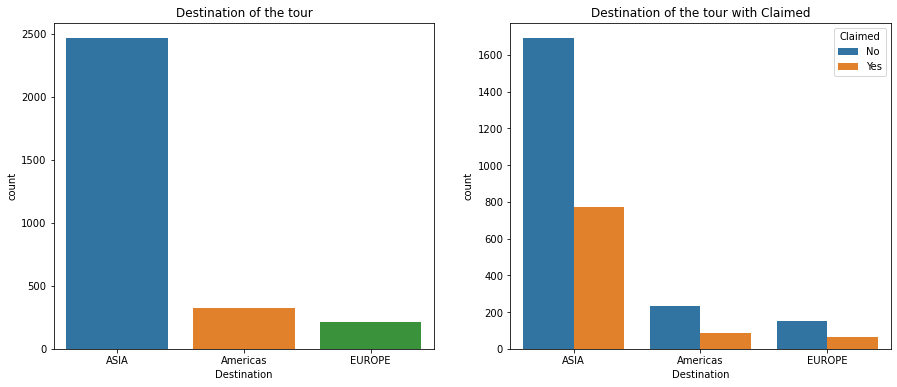

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df2['Destination'])
plt.title("Destination of the tour")
plt.subplot(1,2,2)
sns.countplot(df2['Destination'],hue=("Claimed"),data=df2)
plt.title("Destination of the tour with Claimed");

Observation from above Bar charts

1. Asia is the most among the three destinations in which customers goes and Europe is the least.
2. As the Customers love to tour to Asia the claim number is also high for Asia and least is for Europe

#### Multi-variate Analysis
In the below plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

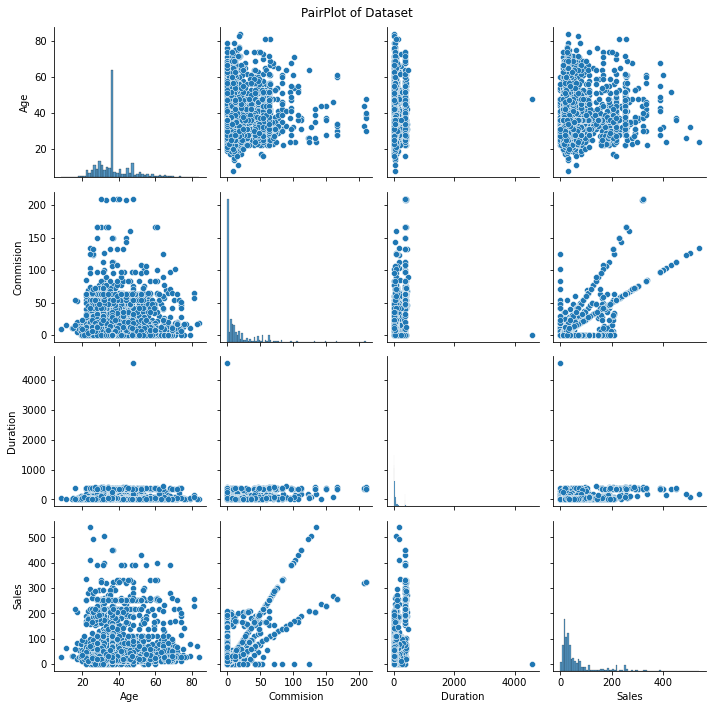

In [19]:
pairplot = sns.pairplot(df2)
pairplot.fig.suptitle("PairPlot of Dataset")
plt.tight_layout()

From the above pairplot Sales and Commision is showing the liner relation ship as the sales increases the commision also increases
And least un-uniform are Duration and Age.

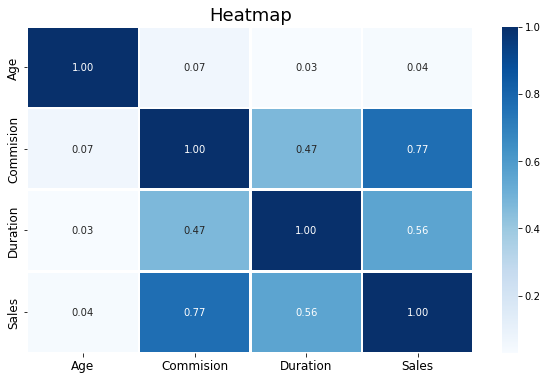

In [20]:
#We can perfom correlation between variables by using heat map
plt.figure(figsize=(10,6))
res=sns.heatmap(df2.corr(),annot=True,fmt=".2f",cmap="Blues",linewidths=1.5);
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12);
plt.title('Heatmap',fontsize = 18);

From the Heatmap Graph we can observed that Sales and Commision is highly co-related with each other and least corelated are Duration and Age.

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [21]:
#Converting all objects to categorical codes
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [23]:
#Proportion of 1s and 0s
# If we increase minority - Oversampling
# iF WE REDUCE MAJORITY - UNDERSAMPLING

print("Data balance""\n",df2.Claimed.value_counts(normalize=True))

Data balance
 0    0.692
1    0.308
Name: Claimed, dtype: float64


In [24]:
#Extracting the target column into separate vectors for training set and test set

In [25]:
X = df2.drop("Claimed", axis=1)
y = df2.pop("Claimed")
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [26]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: Claimed, dtype: int8

In [212]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [31]:
#Checking the dimensions of the training and test data
print("Dimensions of the training and test data")
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Observations',2100+900)

Dimensions of the training and test data
X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Observations 3000


In [32]:
df2.shape

(3000, 9)

#### Building a Decision Tree Classifier

In [33]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [34]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [35]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

#### Variable Importance

In [38]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Important Variables"], index = X_train.columns).sort_values('Important Variables',ascending=False))


              Important Variables
Duration                 0.262122
Sales                    0.199864
Agency_Code              0.194770
Age                      0.177894
Commision                0.095127
Product Name             0.043258
Destination              0.019321
Channel                  0.007262
Type                     0.000383


In [41]:
#Predicting Test Data
y_predict = dt_model.predict(X_test)
y_predict.shape

(900,)

### Regularising the Decision Tree

In [43]:
# Adding Tuning Parameters
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10,min_samples_leaf=100,min_samples_split=100,random_state=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=1)

#### Generating New Tree

In [44]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

### Variable Importance

In [235]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Important Variables"], index = X_train.columns).sort_values('Important Variables',ascending=False))


              Important Variables
Agency_Code              0.643825
Sales                    0.252659
Product Name             0.059402
Duration                 0.022772
Age                      0.016979
Commision                0.004363
Type                     0.000000
Channel                  0.000000
Destination              0.000000


#### Predicting on Training and Test dataset

In [236]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [237]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (2100,)
ytest_predict (900,)


In [238]:
#### Getting the Predicted Classes
ytest_predict

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [239]:
#### Getting the Predicted Probabilities
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.9223301 , 0.0776699 ],
       [0.44047619, 0.55952381],
       [0.74      , 0.26      ],
       ...,
       [0.44047619, 0.55952381],
       [0.91954023, 0.08045977],
       [0.9453125 , 0.0546875 ]])

In [240]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.922330,0.077670
1,0.440476,0.559524
2,0.740000,0.260000
3,0.300885,0.699115
4,0.919540,0.080460


In [241]:
### Model Evaluation
import matplotlib.pyplot as plt

AUC: 0.825


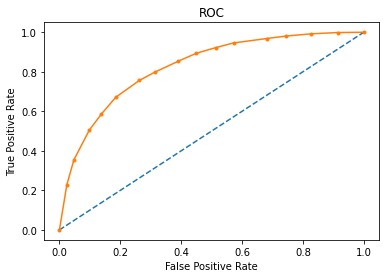

In [308]:
#AUC and ROC for the training data
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_cart, tpr_cart, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_cart, tpr_cart, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# show the plot
plt.show()

In [301]:
cart_train= roc_curve(train_labels, probs)

Area under the curve: 0.799


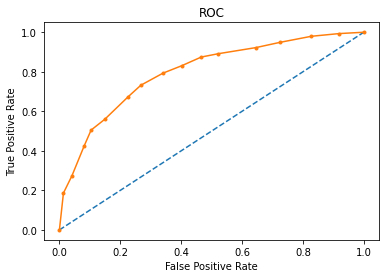

In [313]:
# AUC and ROC for the test data
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('Area under the curve: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_testcart, tpr_testcart, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_testcart, tpr_testcart, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# show the plot
plt.show()

In [244]:
#Confusion Matrix for the training data
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
print("Confusion Matrix for train data""\n",confusion_matrix(train_labels, ytrain_predict))

Confusion Matrix for train data
 [[1327  144]
 [ 312  317]]


In [245]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.7828571428571428

In [246]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1471
           1       0.69      0.50      0.58       629

    accuracy                           0.78      2100
   macro avg       0.75      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [247]:
#Confusion Matrix for test data
print("Confusion Matrix for test data""\n",confusion_matrix(test_labels, ytest_predict))

Confusion Matrix for test data
 [[556  49]
 [170 125]]


In [248]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.7566666666666667

In [249]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.42      0.53       295

    accuracy                           0.76       900
   macro avg       0.74      0.67      0.68       900
weighted avg       0.75      0.76      0.74       900



### Conclusion

Accuracy on the Training Data: 78%

Accuracy on the Test Data: 76%

AUC on the Training Data: 82.5%

AUC on the Test: 79.9%

Accuracy, AUC, Precision for test data is almost inline with training data.

This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

Agent Code and Sales (in same order of preference) are the most important variables in determining if a claimed  will be made or not.

### Ensemble RandomForest Classifier
### Building the Random Forest model
#### Importance of Random State

The important thing is that everytime you use any natural number, you will always get the same output the first time you make the model which is similar to random state while train test split

In [120]:
rfcl = RandomForestClassifier(n_estimators = 101,max_depth=10,max_features=3,random_state=1,oob_score=True)
rfcl = rfcl.fit(X_train, train_labels)
rfcl

RandomForestClassifier(max_depth=10, max_features=3, n_estimators=101,
                       oob_score=True, random_state=1)

In [122]:
#Out of bag (OOB) score is a way of validating the Random forest model.
rfcl.oob_score_*100

78.47619047619048

In [126]:
accuracy = []
for i in np.arange(0,101,1):
    acc = rfcl.estimators_[i].score(X_train, train_labels)
    accuracy.append(acc)

Text(0.5, 1.0, 'Model Accuracy')

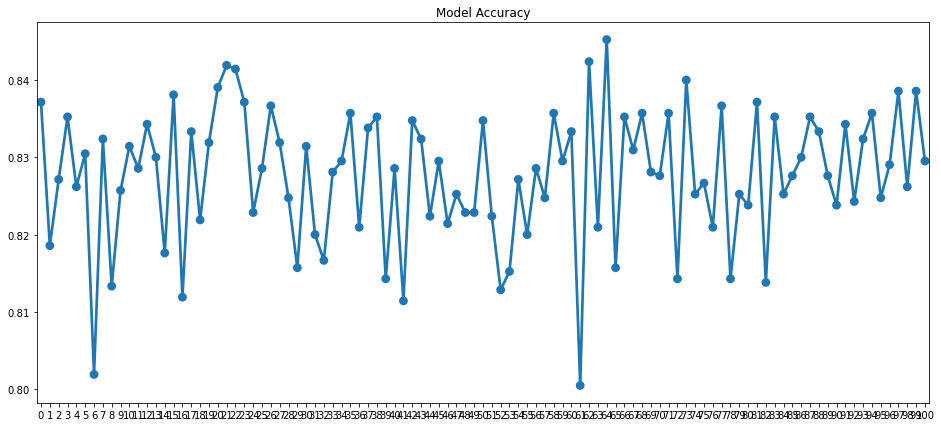

In [131]:
plt.figure(figsize=(16,7))
sns.pointplot(y=accuracy,x=np.arange(0,101,1))
plt.title("Model Accuracy")

### Predicting Train and Test data with the RF Model

In [132]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

#### Train Accuracy

In [133]:
rfcl.score(X_train,train_labels)

0.8895238095238095

In [134]:
#Evaluating model performance with confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

##### valuating model performance on the training data

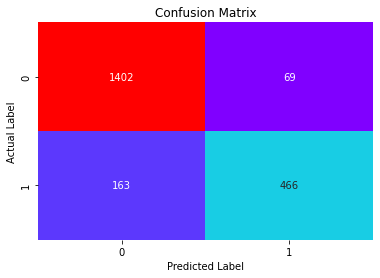

In [135]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [136]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1471
           1       0.87      0.74      0.80       629

    accuracy                           0.89      2100
   macro avg       0.88      0.85      0.86      2100
weighted avg       0.89      0.89      0.89      2100



In [138]:
print('Accuracy', (()/(6)))
print('Sensitivity',((/4))) #TP/Actual yes
print('Specificity',(/)) #TN/Actual no
print('Precision',(/) #TP/Predicted yes

SyntaxError: invalid syntax (<ipython-input-138-1236fe3dde83>, line 2)

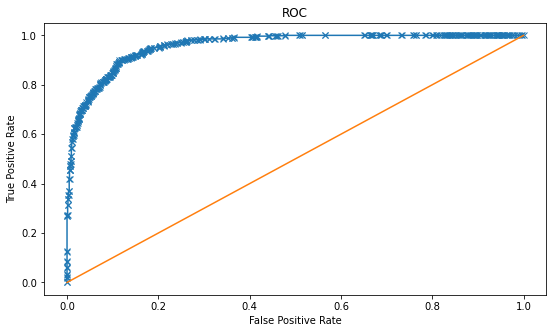

Area under Curve is 0.9587039953137446


In [253]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(9,5))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,rfcl.predict_proba(X_train)[:,1]))

In [300]:
rf_train=roc_curve(train_labels,rfcl.predict_proba(X_train)[:,1])

#### Evaluating model performance on the test data

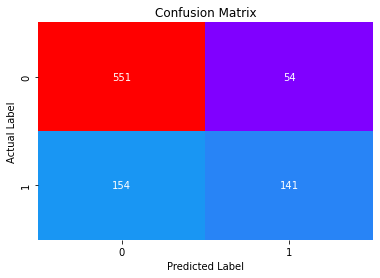

In [140]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [141]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.71       900
weighted avg       0.76      0.77      0.75       900



In [142]:
print('Accuracy', ((+)/(+++)))
print('Sensitivity',((13/(13+182)))) 
print('Specificity',(1019/(1019+3)))
print('Precision',(13/(13+3)))

SyntaxError: invalid syntax (<ipython-input-142-b404d25c9a00>, line 1)

#### Test Accuracy

In [143]:
rfcl.score(X_test,test_labels)

0.7688888888888888

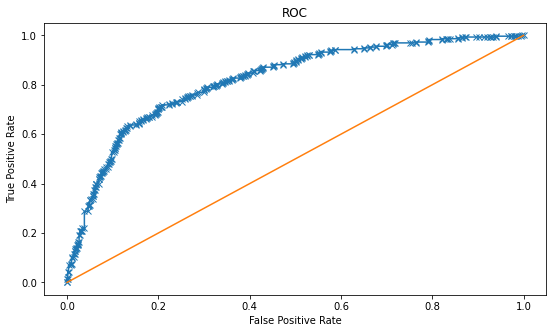

Area under Curve is 0.8188513797450624


In [312]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fprtest, rf_tprtest,_=roc_curve(test_labels,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(9,5))
plt.plot(rf_fprtest,rf_tprtest, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,rfcl.predict_proba(X_test)[:,1]))

### Result:

Area under the curve on the training data is 95.87%, which indicates high performance that all classes have mostly correctly classified. Whereas on the test data model performance is good with AUC 81.88%, which is close as compare to the performance of the training data.
Since we are building a model to predict if a person has claimed travel insurance or not, for practical purposes, we will be more interested in correctly classifying 1 (having insurance claim) than 0(not having claimed).

From the Random Forest model, looking at the Accuracy, Sensitivity, Speficity, Recall and AUC, we have good results on the training data, whereas on the Test data, performance is lesser, especially in predicting Class 1.


### Building Neural Network Model

In [171]:
rem_out=df2
df3.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36.0,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39.0,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36.0,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33.0,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [172]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [173]:
#Cap & floor the values beyond the outlier boundaries
feature_list = rem_out.columns
for i in feature_list:
    LL, UL = remove_outlier(rem_out[i])
    rem_out[i] = np.where(rem_out[i] > UL, UL, rem_out[i])
    rem_out[i] = np.where(rem_out[i] < LL, LL, rem_out[i])

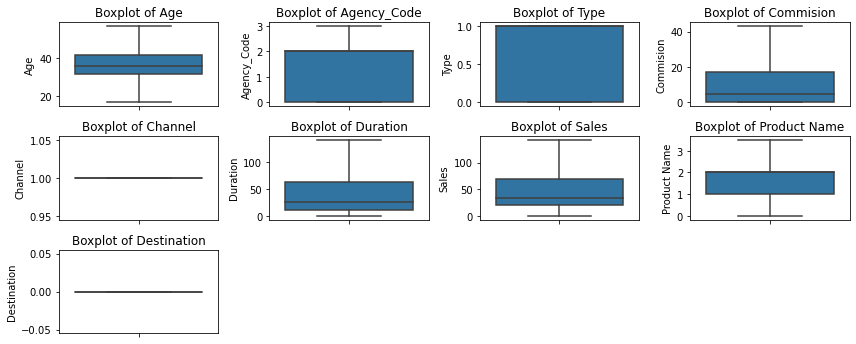

In [174]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,8))
feature_list = rem_out.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = rem_out[feature_list[i]], data = rem_out)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

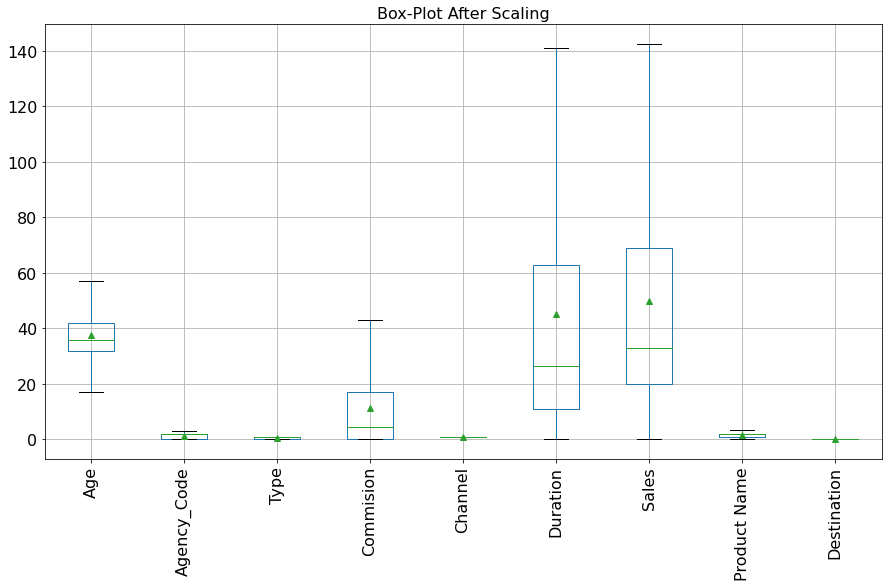

In [175]:
rem_out.boxplot(figsize=(15,8),showmeans=True,fontsize=16)
plt.xticks(rotation=90)
plt.title("Box-Plot After Scaling",fontsize=16)
plt.show()

In [176]:
from sklearn.preprocessing import StandardScaler
#Initialize an object for StandardScaler
sc = StandardScaler()

In [181]:
#Scale the training data
X_train = sc.fit_transform(X_train)

In [182]:
X_train

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [183]:
# Apply the transformation on the test data
X_test = sc.transform(X_test)

In [184]:
X_test

array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49016794,
        -1.34097044, -0.43926017]])

### Building Neural Network Model

In [209]:
clf = MLPClassifier(hidden_layer_sizes=5, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=1,tol=0.01)
clf

MLPClassifier(hidden_layer_sizes=5, max_iter=5000, random_state=1, solver='sgd',
              tol=0.01, verbose=True)

In [210]:
# Fit the model on the training data
clf.fit(X_train, train_labels)

Iteration 1, loss = 0.75073831
Iteration 2, loss = 0.73632520
Iteration 3, loss = 0.71923683
Iteration 4, loss = 0.70378611
Iteration 5, loss = 0.69003831
Iteration 6, loss = 0.67773355
Iteration 7, loss = 0.66701252
Iteration 8, loss = 0.65759950
Iteration 9, loss = 0.64858889
Iteration 10, loss = 0.64053224
Iteration 11, loss = 0.63286050
Iteration 12, loss = 0.62599534
Iteration 13, loss = 0.61948234
Iteration 14, loss = 0.61329810
Iteration 15, loss = 0.60746543
Iteration 16, loss = 0.60209261
Iteration 17, loss = 0.59691552
Iteration 18, loss = 0.59202715
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=5, max_iter=5000, random_state=1, solver='sgd',
              tol=0.01, verbose=True)

### Predicting training data

In [190]:
# use the model to predict the training data
y_pred = clf.predict(X_train)

### Evaluating model performance on training data

In [191]:
from sklearn.metrics import confusion_matrix,classification_report

In [193]:
confusion_matrix(train_labels,y_pred)


array([[1396,   75],
       [ 432,  197]], dtype=int64)

In [197]:
clf.score(X_train,train_labels)

0.7585714285714286

In [198]:
print(classification_report(train_labels, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85      1471
           1       0.72      0.31      0.44       629

    accuracy                           0.76      2100
   macro avg       0.74      0.63      0.64      2100
weighted avg       0.75      0.76      0.72      2100



Area Under the Curve: 0.558


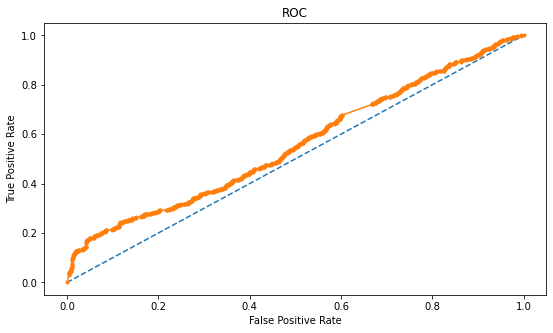

In [303]:
# AUC and ROC for the training data
# predict probabilities
plt.figure(figsize=(9,5))
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('Area Under the Curve: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_nn, tpr_nn, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_nn, tpr_nn, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# show the plot
plt.show()

In [299]:
fpr, tpr, thresholds = roc_curve(train_labels, probs)
nn_train=fpr, tpr, thresholds

### Predicting Test Data and comparing model performance

In [202]:
y_pred = clf.predict(X_test)

In [203]:
confusion_matrix(test_labels, y_pred)

array([[582,  23],
       [216,  79]], dtype=int64)

In [205]:
clf.score(X_test,test_labels)

0.7344444444444445

In [206]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       605
           1       0.77      0.27      0.40       295

    accuracy                           0.73       900
   macro avg       0.75      0.61      0.61       900
weighted avg       0.74      0.73      0.69       900



Area Under the Curve: 0.590


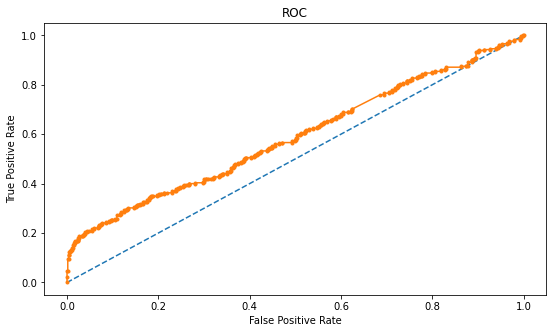

In [311]:
# AUC and ROC for the test data

# predict probabilities
plt.figure(figsize=(9,5))
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(test_labels, probs)
print('Area Under the Curve: %.3f' % auc)
# calculate roc curve
fpr_nntest, tpr_nntest, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_nntest, tpr_nntest, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# show the plot
plt.show()

Area under the curve is 59%. True Positive Rate is plotted on y-axis and False Positive Rate is plotted on x-axis.

AUC on the training data is 55.8% and on test data is 59%. The precision and recall metrics are also almost differ between training and test set, which indicates over fitting or under fitting has happened.


The Overall model performance is not moderate enough to start predicting if any new customer will claim insurance or not.


In [274]:
nn_test_auc=0.59
nn_test_acc=0.73
nn_test_pre=0.77
nn_test_recall=0.27
nn_test_f1score=0.40

In [275]:
nn_train_auc=0.55
nn_train_acc=0.76
nn_train_pre=0.72
nn_train_recall=0.31
nn_train_f1score=0.44

In [276]:
rf_test_auc=0.81
rf_test_acc=0.77
rf_test_pre=0.72
rf_test_recall=0.48
rf_test_f1score=0.58

In [277]:
rf_train_auc=0.95
rf_train_acc=0.89
rf_train_pre=0.87
rf_train_recall=0.74
rf_train_f1score=0.80

In [278]:
cart_test_auc=0.79
cart_test_acc=0.75
cart_test_pre=0.72
cart_test_recall=0.42
cart_test_f1score=0.53

In [279]:
cart_train_auc=0.82
cart_train_acc=0.78
cart_train_pre=0.69
cart_train_recall=0.50
cart_train_f1score=0.58

In [280]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_pre,cart_train_f1score],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_pre,cart_test_f1score],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_pre,rf_train_f1score],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_pre,rf_test_f1score],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_pre,nn_train_f1score],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_pre,nn_test_f1score]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.75,0.89,0.77,0.76,0.73
AUC,0.82,0.79,0.95,0.81,0.55,0.59
Recall,0.50,0.42,0.74,0.48,0.31,0.27
Precision,0.69,0.72,0.87,0.72,0.72,0.77
F1 Score,0.58,0.53,0.80,0.58,0.44,0.40


#### ROC Curve for the 3 models on the Training data

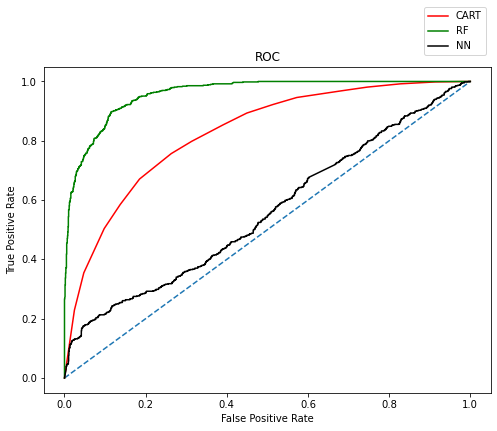

In [309]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_cart, tpr_cart,color='red',label="CART")
plt.plot(rf_fpr,rf_tpr,color='green',label="RF")
plt.plot(fpr_nn, tpr_nn,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve for the 3 models on the Test data

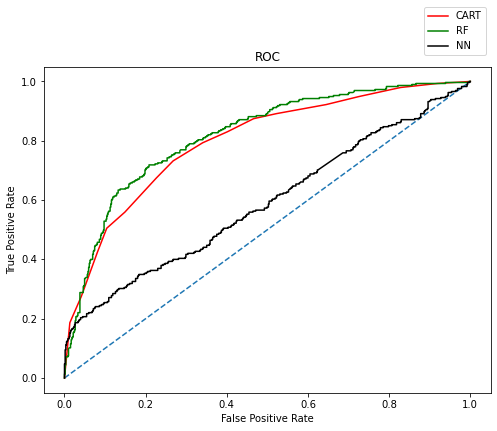

In [315]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_testcart, tpr_testcart,color='red',label="CART")
plt.plot(rf_fprtest,rf_tprtest,color='green',label="RF")
plt.plot(fpr_nntest, tpr_nntest,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')